In [1]:
ls

globalpowerplantdatabasev110/  globalpowerplantdatabasev110.zip  Untitled.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "globalpowerplantdatabasev110/global_power_plant_database.csv"

In [3]:
power = pd.read_csv(file)

In [63]:
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [65]:
power.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,2.866400e+04,14952.000000,16145.000000,439.000000,455.000000,958.000000,8326.000000,27536.000000
mean,186.097600,68.817502,9.925621e+01,1994.698521,2016.035367,2339.270238,2622.049124,1859.660249,532.668481,807.796919
std,523.027253,3610.172087,1.092781e+04,23.406231,1.258145,4384.011370,4138.194312,3965.618811,1935.490760,2687.873796
min,1.000000,-77.847000,-1.799777e+02,1896.000000,2000.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,4.795850,28.010225,-7.905748e+01,1985.000000,2016.000000,226.735625,253.466300,57.898941,3.197500,8.099628
50%,18.640000,39.950000,-3.928400e+00,2004.000000,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,99.200000,46.980275,2.100702e+01,2012.000000,2016.000000,2636.217675,3170.871000,2152.211500,176.508999,293.907237
max,22500.000000,415750.000000,1.075744e+06,2018.000000,2018.000000,50834.000000,28127.000000,59546.865000,32377.477000,92268.763466


/home/seapea/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Standard deviation of Megawatt Capacity per country')

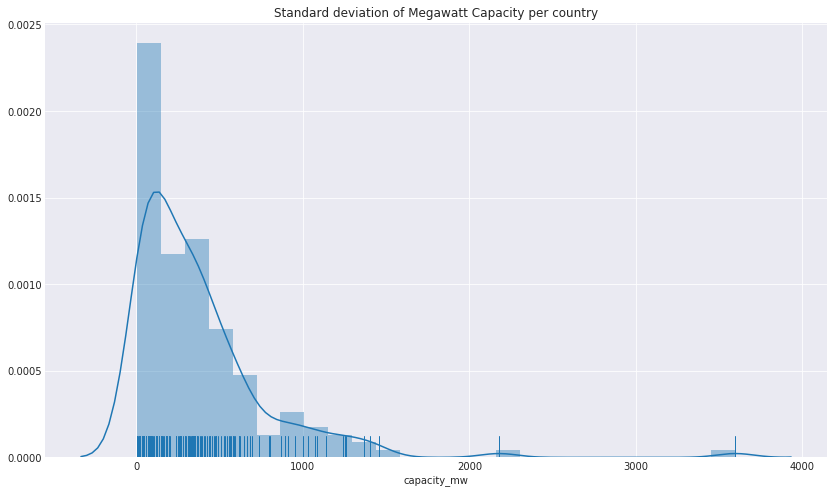

In [73]:
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
sns.distplot(power.groupby('country')['capacity_mw'].agg(np.std).dropna(), rug=True).set_title('Standard deviation of Megawatt Capacity per country')

In [64]:
# power.groupby('country')['capacity_mw'].agg(np.std).dropna()

In [6]:
print(power.fuel2.describe(), "\n\n", power.fuel3.describe(), "\n\n", power.fuel4.describe())

count     1705
unique      11
top        Gas
freq      1010
Name: fuel2, dtype: object 

 count     296
unique     11
top       Gas
freq      138
Name: fuel3, dtype: object 

 count         108
unique          8
top       Biomass
freq           55
Name: fuel4, dtype: object


In [7]:
print(power.fuel1.unique())
print(power.fuel2.unique())
print(power.fuel3.unique())
print(power.fuel4.unique())

['Hydro' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Solar' 'Waste'
 'Biomass' 'Wave and Tidal' 'Geothermal' nan 'Cogeneration' 'Storage'
 'Petcoke']
[nan 'Solar' 'Other' 'Hydro' 'Gas' 'Oil' 'Wind' 'Petcoke' 'Biomass' 'Coal'
 'Storage' 'Waste']
[nan 'Gas' 'Oil' 'Waste' 'Solar' 'Biomass' 'Hydro' 'Other' 'Storage'
 'Wind' 'Coal' 'Petcoke']
[nan 'Gas' 'Other' 'Biomass' 'Solar' 'Oil' 'Hydro' 'Petcoke' 'Wind']


/home/seapea/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


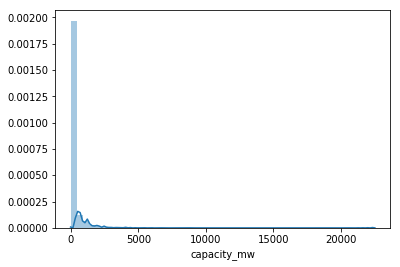

In [8]:
sns.distplot(power['capacity_mw'])

In [10]:
power['fuel1'].value_counts()

Hydro             7034
Solar             5424
Wind              5084
Gas               3068
Oil               2925
Coal              2172
Biomass           1290
Waste             1143
Nuclear            199
Geothermal         186
Cogeneration        43
Storage             39
Other               36
Wave and Tidal      10
Petcoke              8
Name: fuel1, dtype: int64

In [16]:
power[power['fuel1'] == 'Hydro']['capacity_mw'].describe()
# sns.distplot(power[power['fuel1'] == 'Hydro']['capacity_mw'])

count     7034.000000
mean       148.687422
std        559.174623
min          1.000000
25%          5.308750
50%         20.000000
75%         93.225000
max      22500.000000
Name: capacity_mw, dtype: float64

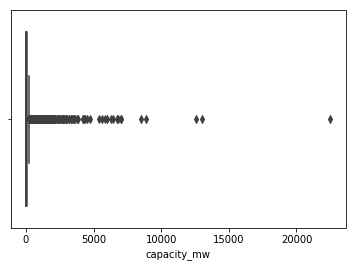

In [17]:
sns.boxplot(power[power['fuel1'] == 'Hydro']['capacity_mw'])